$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\def\lc{\left\lceil}$$
$$\def\rc{\right\rceil}$$
# Grover's algorithm, a deep dive

Grover's algorithm, often referred to as the *quantum search algorithm*, is an algorithm for unstructed search proposed by [Lov Grover](https://en.wikipedia.org/wiki/Lov_Grover) in 1996. It finds with high probability the input $\omega$ to a black box function $f$ which produces a particular value. It speeds up unstructed search quadratically. 

The steps of Grover's algorithm are as follows:

1. Initialize the system to the uniform superposition over all states

$$\ket{s} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}\ket{x}.$$


2. Perform the following *grover iteration* $rN$ times:
    1. apply the operator $U_f$
    2. apply the *Grover diffusion* operator $U_s$


3. Measure the resulting quantum state in the computational basis.

The value of $r$ has to be chosen such that it satisfies the following inequality

$$rN \leq \lc\frac{\pi}{4}\sqrt{N}\rc.$$

The operators $U_f$ and $U_s$ are defined accordingly

$$U_f\ket{i}=(-1)^{f(x_i)}\ket{i},$$


$$U_s = 2\ket{s}\bra{s} - I\\ = H^{\otimes n}U_0H^{\otimes n}\\=H^{\otimes n}(2\ket{0}\bra{0}-I)H^{\otimes n}$$

where $H^{\otimes n}$ is the Walsh-Hadamard matrix for $n$ qubits and $I$ is the identity matrix.

---
Lets start with the trivial example. We construct the function $f$ which asks a question of the form "*is $i=x_i$?*". Assume that the item we are searching for in our database $X=\{0, 1, 2, 3\}$ is $\omega = \ket{01} = 1$. 

First step is to initialize the system in superposition, which is done with the Walsh-Hadamard matrix accordingly

$$H^{\otimes 2}\ket{00} = \ket{s} = \frac{1}{2}(\ket{00} + \ket{01} + \ket{10} + \ket{11}).$$

Next we define our query operator $U_f$, or sometimes referred to as *oracle*, in the following way

$$U_f\ket{i} = (-1)^{f(x_i)}\ket{i} = \begin{bmatrix}1 & 0 & 0 & 0\\0 & -1 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{bmatrix}.$$

What this operator does is it reflects the current quantum state vector $\ket{s}$ around the basis vector $\ket{s'}$ that is perpendicular to our searched for state $\ket{\omega}$. Practically it does so by adding negative phase (note the $-1$ in the matrix) for the item we are searching for $\omega$. But, here as we note in the trivial example, the only way we can construct the specific oracle is by knowning where the item $\omega$ resides in the dataset $X$. So we already know where $\omega$ is. It is precisely in the matrix $U_f$ where the entry has the value $-1$. 

Then why would we be interested in Grover's algorithm at all?

---
For the trivial case which is often used in tutorials or examples showcasing the algorithm, there is no real need for it. However, the algorithm proposes a method that is widely applicable as a subroutine in many different problems. Namely, *amplitude amplification*. We amplify the amplitude of an item $\omega_i$ which satisfies some function $f$ and simultaneously suppress all other items $\omega_j$. 

This leads to us being able to search in $\mathcal{O}(\sqrt{N})$ on a quantum computer instead of $\mathcal{O}(N)$ as is the case for classical computers, given an unstructed dataset $X$ of size $N$.

Furthermore, as mentioned, the amplitude amplification trick can be used to speed up a wide range of *NP-complete* problems that contain exhaustive search subroutines. Ofcourse, *constraint satisfaction problems* can naturally be solved with Grover's algorithm, like the famous 3SAT instace, and in which we do not need to construct an oracle.

For the keen eye, you might have realized at this point of studying quantum computing a special property of Grover's algorithm. It essentially solves the problem of *function inversion*. We have defined a function $y = f(x)$ that can be evaluated on a quantum computer, and since the qubits can be in superposition $\ket{s}$ we can efficiently brute force the matrix $U_f$ (the oracle) which gives us $x$ when presented $y$. This provides asymptotic speed-up to brute-force attacks on cryptographic algorithms, like *symmetric-key cryptography*. 


---
Lets continue with our trivial example, and actually calculate how many times we need to perform the Grover iteration, meaning, how many times do we need to rotate the original state $\ket{s}$ to reach the searched for state $\ket{\omega}$?

$$2r \leq \lc\frac{\pi}{4}\sqrt{4}\rc = 2, \to r=1$$

We only need to perform the iteration once. Lovely. Now we need to apply the oracle matrix $U_f$. We have already defined this unitary matrix, so lets get calculating (remember that our current state of the circuit is $\ket{s}$).

$$U_f\ket{s} = U_f\frac{1}{2}(\ket{00} + \ket{01} + \ket{10} + \ket{11}) = \frac{1}{2}(\ket{00} - \ket{01} + \ket{10} + \ket{11})$$

Next step is the diffusion operation, which we have also defined (loosely), but we have not defined the intermediary unitary matrix $U_0$ which performs the rotations. Lets do that.

$$U_sU_f\ket{s}=H^{\otimes 2}U_0H^{\otimes 2}U_f\ket{s}$$

$$U_0=(2\ket{0}\bra{0}-I)=\begin{bmatrix}2 & 0 & 0 & 0\\ 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0\end{bmatrix} - I =\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & -1 & 0 & 0\\ 0 & 0 & -1 & 0\\ 0 & 0 & 0 & -1\end{bmatrix}$$


The intermediate matrix result is achieved because $\ket{\phi}\bra{\psi}$ is precisely the *outer product* of two vectors. With this unitary matrix at hand, we can finish up our calculations that should yield us the searched for state $\ket{\omega}= 1 = \ket{01}$ (remember that our current state is still $U_f\ket{s}$).

$$H^{\otimes 2}U_f\ket{s} = \frac{1}{2}\begin{bmatrix}1 & 1 & 1 & 1\\ 1 & -1 & 1 & -1\\ 1 & 1 & -1 & -1\\ 1 & -1 & -1 & 1\end{bmatrix}\frac{1}{2}(\ket{00} - \ket{01} + \ket{10} + \ket{11}) = $$

$$ = \frac{1}{4}\biggl( \begin{pmatrix}1\\1\\1\\1\end{pmatrix} - \begin{pmatrix}1\\-1\\1\\-1\end{pmatrix} + \begin{pmatrix}1\\1\\-1\\-1\end{pmatrix}+\begin{pmatrix}1\\-1\\-1\\1\end{pmatrix}\biggr) = \frac{1}{4}\begin{pmatrix}2\\2\\-2\\2\end{pmatrix}=\frac{1}{2}(\ket{00}+\ket{01}-\ket{10}+\ket{11})$$


$$U_0H^{\otimes 2}U_f\ket{s} = \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & -1 & 0 & 0\\ 0 & 0 & -1 & 0\\ 0 & 0 & 0 & -1\end{bmatrix}\frac{1}{2}(\ket{00}+\ket{01}-\ket{10}+\ket{11}) =$$

$$= \frac{1}{2}(\ket{00}-\ket{01}+\ket{10}-\ket{11})$$


$$H^{\otimes 2}U_0H^{\otimes 2}U_f\ket{s} = \frac{1}{2}\begin{bmatrix}1 & 1 & 1 & 1\\ 1 & -1 & 1 & -1\\ 1 & 1 & -1 & -1\\ 1 & -1 & -1 & 1\end{bmatrix}\frac{1}{2}(\ket{00}-\ket{01}+\ket{10}-\ket{11})=$$

$$=\frac{1}{4}\biggl( \begin{pmatrix}1\\1\\1\\1\end{pmatrix} - \begin{pmatrix}1\\-1\\1\\-1\end{pmatrix} + \begin{pmatrix}1\\1\\-1\\-1\end{pmatrix}-\begin{pmatrix}1\\-1\\-1\\1\end{pmatrix}\biggr)=\frac{1}{4}\begin{pmatrix}0\\4\\0\\0\end{pmatrix}=\ket{01}=\ket{\omega}.$$


Hooray! We got what we searched for, but as mentioned, we already knew where $\ket{\omega}=\ket{01}$ resides in the dataset $X$. Anyway, we got a good grip of how amplitude amplification works. We perform two reflections with the unitary matrices $U_f$ and $U_0$ such that the superposition state $\ket{s}$ is rotated closer to the searched for state $\ket{\omega}$ (two reflections always correspond to a rotation).


In [1]:
# !pip install qiskit
# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# !pip install pylatexenc


In [2]:
from qiskit.quantum_info import Statevector
from qiskit.extensions import UnitaryGate
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram
from qiskit import Aer, transpile, QuantumCircuit
import numpy as np


In [3]:
def reflect(qc, nqubits):
    """ Add reflection around |0> to the provided quantum circuit. """
    U0 = -np.eye(2**nqubits)
    U0[0, 0] = 1
    
    U0_gate = UnitaryGate(U0)
    U0_gate.name = 'U0'
    qc.append(U0_gate, list(range(nqubits)))
    
    return qc

def oracle(qc, nqubits, omegas):
    """ Create the oracle function based on searched for omegas. """
    Uf = np.eye(2**nqubits)
    
    # mark the searched for instances in the Uf matrix as -1, adding
    # negative phase by reflecting them around their own axis (?)
    for w in omegas:
        Uf[w, w] = -Uf[w, w]
    
    Uf_gate = UnitaryGate(Uf)
    Uf_gate.name= 'Uf'
    qc.append(Uf_gate, list(range(nqubits)))
    
    return qc

def superposition(qc, qubits):
    """ Apply the Walsh-Hadamard gate on the specified qubits. """
    qc.h(qubits)
    return qc
    

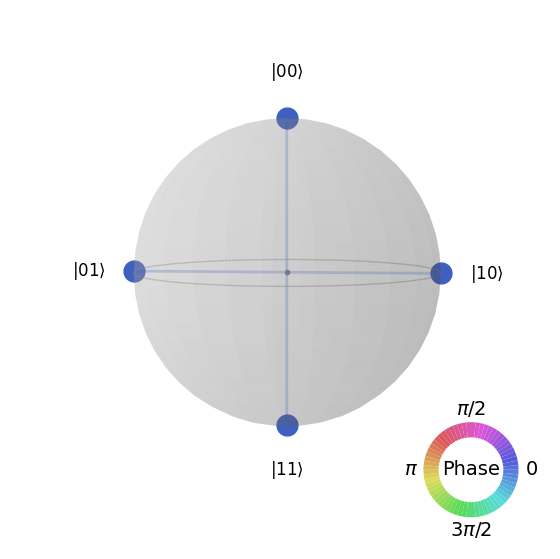

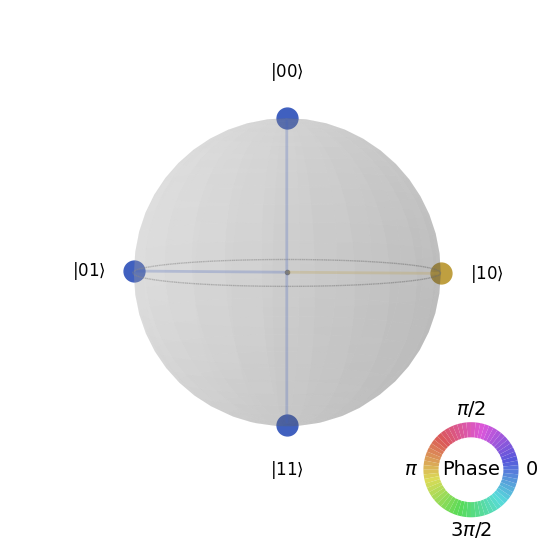

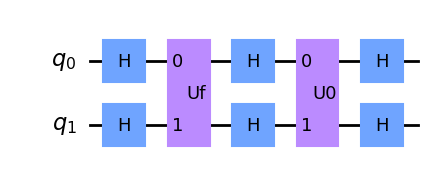

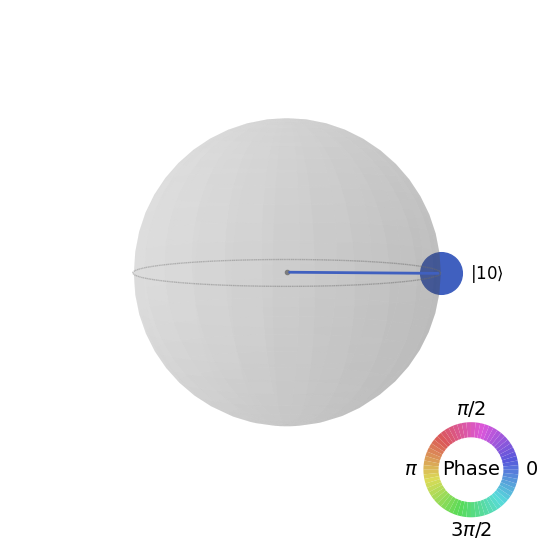

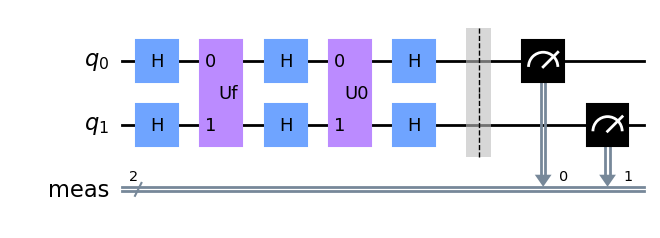

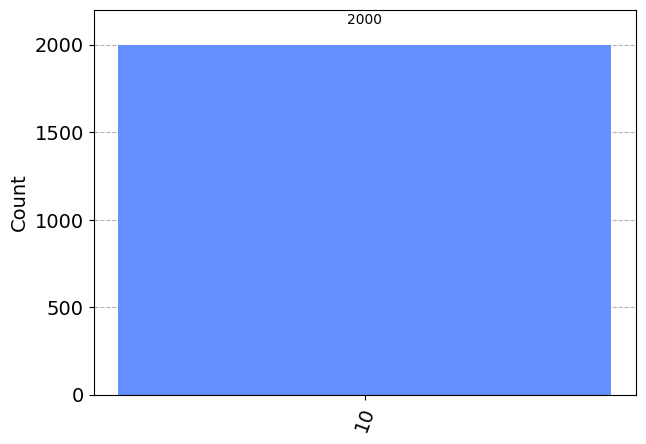

In [4]:
""" Play around with different values for W and look at how the
phase of the superposition states |s> change as we apply
the oracle and reflection unitary matrices.
"""
W = [2]

QC = QuantumCircuit(2)
QC = superposition(QC, [0, 1])
display(plot_state_qsphere(QC))

QC = oracle(QC, 2, W)
display(plot_state_qsphere(QC))

QC = superposition(QC, [0, 1])
QC = reflect(QC, 2)
QC = superposition(QC, [0, 1])

display(QC.draw('mpl'))
display(plot_state_qsphere(QC))

QC.measure_all()
display(QC.draw('mpl'))

simulator = Aer.get_backend('qasm_simulator')
QC = transpile(QC, simulator)
result = simulator.run(QC, shots=2000, memory=True).result()
counts = result.get_counts(QC)

display(plot_histogram(counts))


---
Can we search for multiple entries defined by the set $S = \{\omega_1, ..., \omega_k\}$ in our database $X$? Ofcourse. But, there are some considerations that have to be made. Firstly, the calculation of the amount of Grover iterations to perform changes. It is now defined by the inequality

$$rN \leq \lc \frac{\pi}{4}\sqrt{\frac{N}{k}} \rc.$$

For example, lets say that we have the database $X=\{0, 1, 2, 3\}$ and we want to find the oracle which satisfies the function $f$ that asks the question "*is $x_i$ a prime number?*", then the number of Grover iterations we would have to perform is

$$2r \leq \lc \frac{\pi}{4}\sqrt{\frac{4}{2}} \rc = \lc \frac{\pi}{4}\sqrt{2} \rc = 2, \to r = 1 $$

which is the same as before. Secondly, we have to define the reflection $U_f$ (oracle) with consideration to all items we are searching for. Traditionally, when searching only for a single item $\ket{\psi}$, the reflection is defined as 

$$U_f = I - 2\ket{\psi}\bra{\psi}$$

but when we search for multiple items, the outer product (which is $\ket{\psi}\bra{\psi}$ as before), has to consider the subset of items searched for. This reflection thus becomes

$$U_f = I - 2\sum_{x\in S}\ket{x}\bra{x}$$

which relates to a reflection/inversion about $\ket{S}$ for states in the subspace spanned by $\ket{S}$ and $\ket{+}$ (the plus state becuase the qubits initial state is $\ket{00}$).


---
Lets continue with the above example, where $X=\{0, 1, 2, 3\}$ and $f: X \to \{0, 1\}$ according to the question "*is $x_i$ a prime number?*". We known that items in $X$ which are prime are $\omega_2=\ket{10}=2$ and $\omega_3=\ket{11}=3$. Thus, our oracle which we can define, but we also know can be brute forced in polynomial time, is exactly the matrix

$$U_f = I - 2\sum_{x\in S}\ket{x}\bra{x} = \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & -1 & 0\\ 0 & 0 & 0 & -1\end{bmatrix}.$$

Like in the previous example, the Grover diffusion operation is performed in the exact same way. As such, we use the same $H_0$ matrix to perform the $U_s$ operation. Lets calculate.

$$H^{\otimes 2}\ket{00} = \ket{s} = \frac{1}{2}(\ket{00} + \ket{01} + \ket{10} + \ket{11})$$

$$U_fH^{\otimes 2}\ket{00} = \ket{s} = \frac{1}{2}(\ket{00} + \ket{01} - \ket{10} - \ket{11})$$

$$H^{\otimes 2}U_fH^{\otimes 2}\ket{00} = \ket{10}$$

$$U_0H^{\otimes 2}U_fH^{\otimes 2}\ket{00} = -\ket{10}$$

$$H^{\otimes 2}U_0H^{\otimes 2}U_fH^{\otimes 2}\ket{00} = \frac{1}{2}(-\ket{00} - \ket{01} + \ket{10} + \ket{11})$$

In this example, this oracle is no more help than picking an item $\omega$ from $X$ at random, exactly $50\%$. What does this mean geometrically? For one search item, we know that the two reflections $U_f$ and $U_s$ rotate the superposition state $\ket{s}$ closer to the searched for item $\ket{\omega}$. But what state vector $\ket{\psi}$ are we actually rotating towards when we are searching for multiple items spanned by the subspace $\ket{S}$?


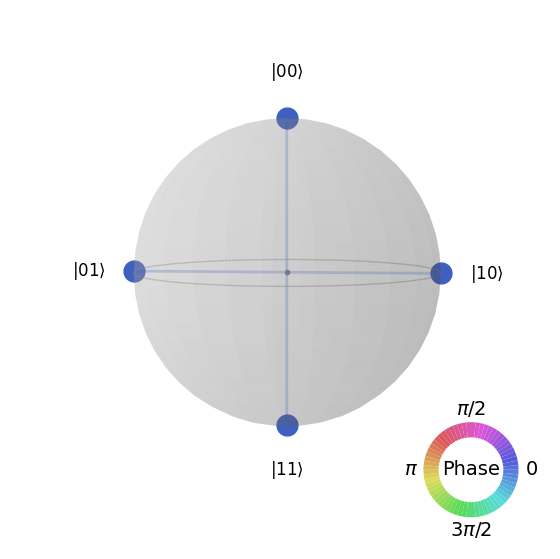

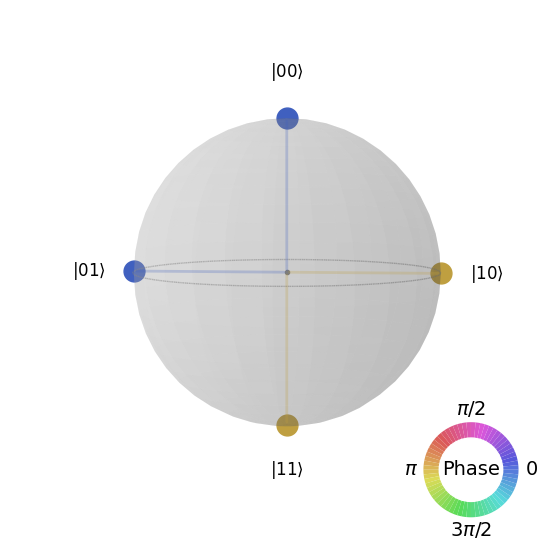

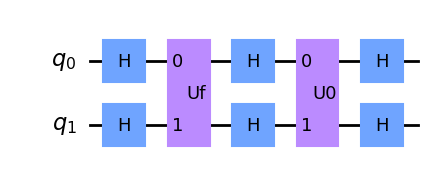

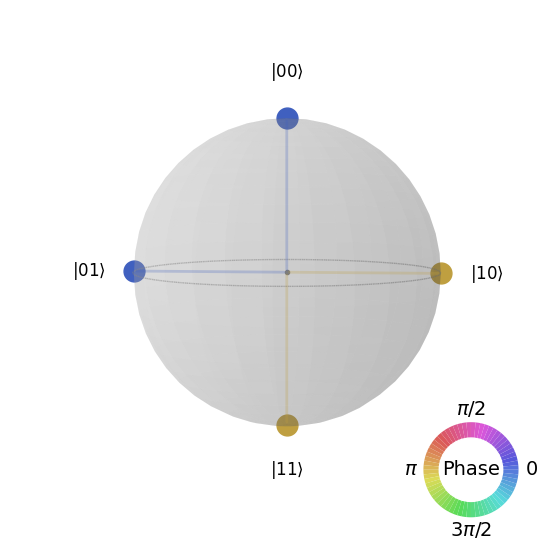

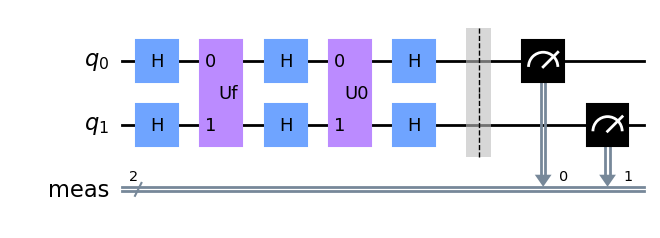

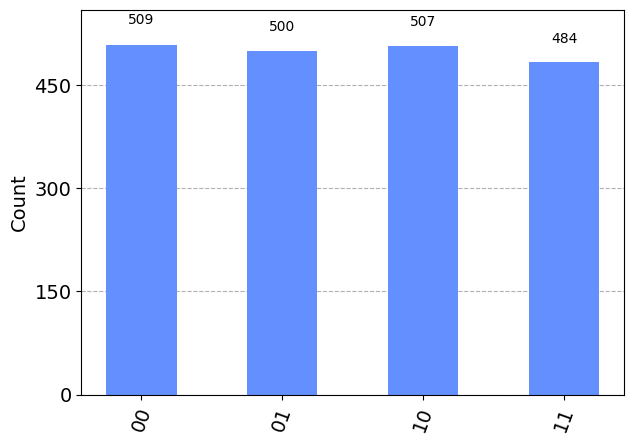

In [5]:
# lets simulate the above example of multiple search items |10> and |11>
W = [2, 3]

QC = QuantumCircuit(2)
QC = superposition(QC, [0, 1])
display(plot_state_qsphere(QC))

QC = oracle(QC, 2, W)
display(plot_state_qsphere(QC))

QC = superposition(QC, [0, 1])
QC = reflect(QC, 2)
QC = superposition(QC, [0, 1])

display(QC.draw('mpl'))
display(plot_state_qsphere(QC))

QC.measure_all()
display(QC.draw('mpl'))

simulator = Aer.get_backend('qasm_simulator')
QC = transpile(QC, simulator)
result = simulator.run(QC, shots=2000, memory=True).result()
counts = result.get_counts(QC)

display(plot_histogram(counts))


---
Now lets run a more complex search query. Suppose we have the unstructed database 

$$X=\{x_0, x_1, ..., x_7\} = \{100, 105, 104, 106, 101, 103, 102, 99\}$$

and we again define the function $f:X\to\{0, 1\}$ that answers the question "*is $x_i$ a prime number?*" such that we obtain the resulting set of output values as 

$$ f(X) = \{0, 0, 0, 0, 1, 1, 0, 0\}$$.

Provided this problem formulation, we want to find the states $\ket{100}$ and $\ket{101}$. The subspace $S=\{4, 5\}=\{\ket{100}, \ket{101}\}$ defines the index of items we are searching for. With this we can construct the reflection matrix $U_f$ (oracle) as

$$U_f = I - 2\sum_{x\in S}\ket{x}\bra{x} = \begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\ \end{bmatrix}.$$

We quickly see how cumbersome it becomes to write out all of these matrices as the number of qubits grows. This is precisely one of the reasons why simulating quantum computers have polynomial memory- and time complexity, since it requires $2^n$ bits to represent $n$ qubits. So lets perform all of this in code instead...


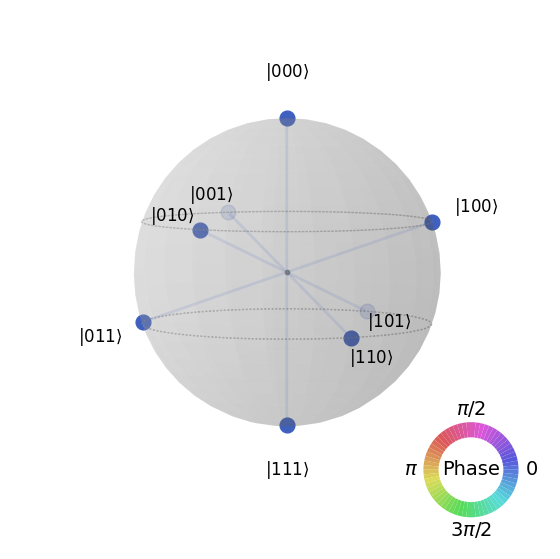

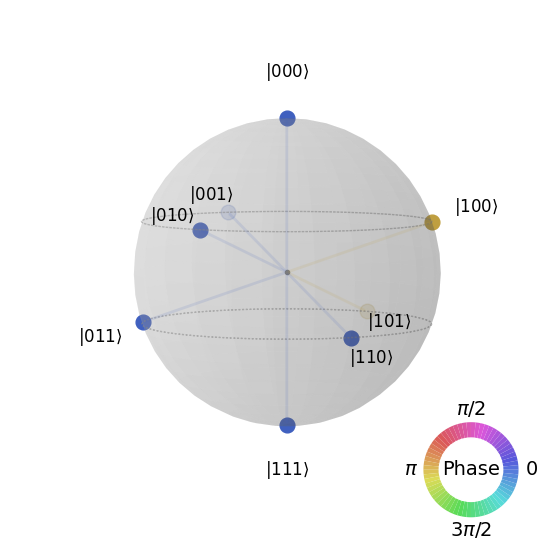

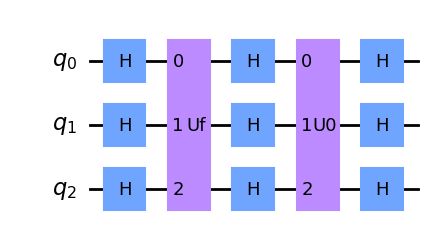

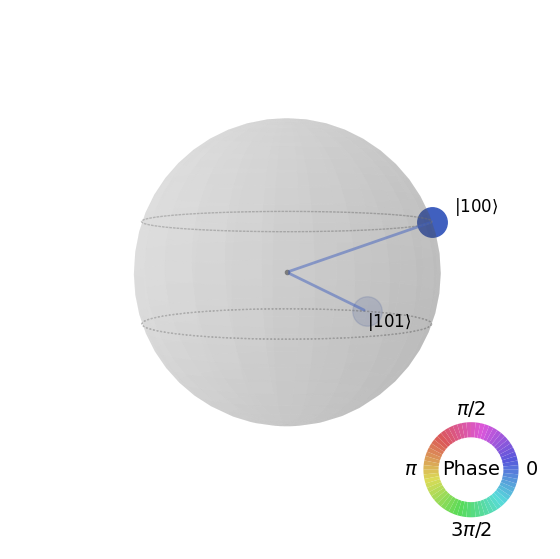

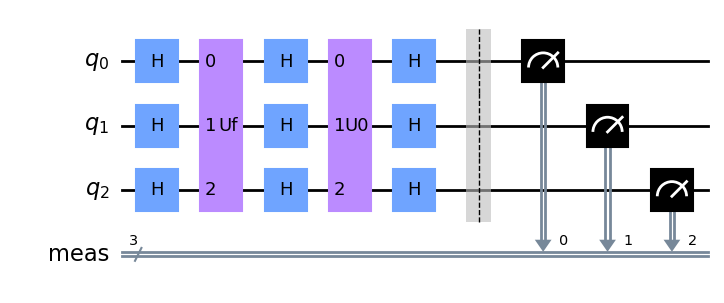

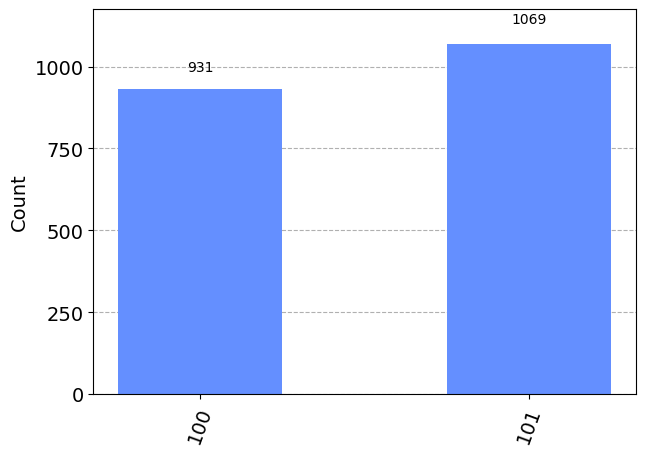

In [6]:
# lets simulate the above example of multiple search items |100> and |101>
W = [4, 5]

QC = QuantumCircuit(3)
QC = superposition(QC, [0, 1, 2])
display(plot_state_qsphere(QC))

QC = oracle(QC, 3, W)
display(plot_state_qsphere(QC))

QC = superposition(QC, [0, 1, 2])
QC = reflect(QC, 3)
QC = superposition(QC, [0, 1, 2])

display(QC.draw('mpl'))
display(plot_state_qsphere(QC))

QC.measure_all()
display(QC.draw('mpl'))

simulator = Aer.get_backend('qasm_simulator')
QC = transpile(QC, simulator)
result = simulator.run(QC, shots=2000, memory=True).result()
counts = result.get_counts(QC)

display(plot_histogram(counts))